# **Assignment 5: NLP**

### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Ruoheng Du
### UNI: rd3165

### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [11]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.2) Load the positive & negative tweets**

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Make a data frame that has all tweets and their corresponding labels**

In [3]:
# Your Code Here
positive_df = pd.DataFrame({'tweet': all_positive_tweets, 'label': 1})
negative_df = pd.DataFrame({'tweet': all_negative_tweets, 'label': 0})

tweets_df = pd.concat([positive_df, negative_df], ignore_index=True)
tweets_df = tweets_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(tweets_df.head())

                                               tweet  label
0  I love you, how but you? @Taecyeon2pm8 did you...      0
1  @mayusushita @dildeewana_ @sonalp2591 @deepti_...      1
2  Your love, O Lord, is better than life. :) &lt...      1
3  @yasminyasir96 yeah but it will be better if w...      1
4  Ok good night I wish troye wasn't ugly and I m...      1


**1.4) Look at the class distribution of the tweets**

Class Distribution:
label
0    5000
1    5000
Name: count, dtype: int64


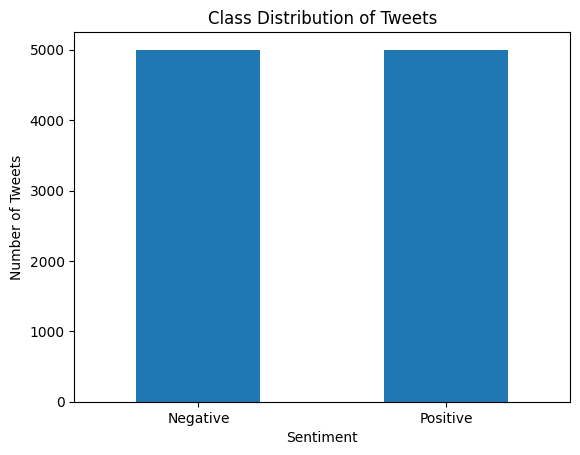

In [4]:
# Your Code Here
# Check the distribution of classes (labels)
class_distribution = tweets_df['label'].value_counts()
print("Class Distribution:")
print(class_distribution)

import matplotlib.pyplot as plt
class_distribution.plot(kind='bar')
plt.title("Class Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

**1.5) Create a development & test split (80/20 ratio):**

In [9]:
# Your Code Here
X = tweets_df['tweet']  # Features: the tweets
y = tweets_df['label']  # Labels: sentiment (0 or 1)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Number of training samples: {len(X_dev)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 8000
Number of testing samples: 2000


#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings.

**1.6) Replace the `#` symbol with '' in every tweet**

In [6]:
# Your Code Here
X_dev = X_dev.str.replace(r'#', '', regex=True)
X_test = X_test.str.replace(r'#', '', regex=True)

**1.7) Replace hyperlinks with '' in every tweet**

In [7]:
# Your Code Here
X_dev = X_dev.str.replace(r'http\S+|www\S+', '', regex=True)
X_test = X_test.str.replace(r'http\S+|www\S+', '', regex=True)

**1.8) Remove all stop words**

In [ ]:
# Your Code Here
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

X_dev = X_dev.apply(remove_stop_words)
X_test = X_test.apply(remove_stop_words)

**1.9) Remove all punctuations**

In [ ]:
# Your Code Here
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

X_dev = X_dev.apply(remove_punctuation)
X_test = X_test.apply(remove_punctuation)

**1.10) Apply stemming on the development & test datasets using Porter algorithm**

In [ ]:
# Your Code Here
stemmer = PorterStemmer()

def apply_stemming(text):
    words = word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

X_dev = X_dev.apply(apply_stemming)
X_test = X_test.apply(apply_stemming)

#### **Model training**

**1.11) Create bag of words features for each tweet in the development dataset**

In [ ]:
# Your Code Here
vectorizer = CountVectorizer()

X_dev_bow = vectorizer.fit_transform(X_dev)
X_test_bow = vectorizer.transform(X_test)

**1.12) Train a Logistic Regression model on the development dataset**

In [20]:
# Your Code Here
logreg_bow = LogisticRegressionCV(random_state=42)

# Train the model on the development dataset
logreg_bow.fit(X_dev_bow, y_dev)

# Print the training accuracy
train_accuracy = logreg_bow.score(X_test_bow, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.7545


**1.13) Create TF-IDF features for each tweet in the development dataset**

In [ ]:
# Your Code Here
tfidf_vectorizer = TfidfVectorizer()

X_dev_tfidf = tfidf_vectorizer.fit_transform(X_dev)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**1.14) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [21]:
# Your Code Here
logreg_tfidf = LogisticRegressionCV(random_state=42)

# Train the model on the development dataset
logreg_tfidf.fit(X_dev_tfidf, y_dev)

# Print the training accuracy
train_accuracy = logreg_tfidf.score(X_test_tfidf, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.7625


**1.15) Compare the performance of the two models on the test dataset using a classification report and the scores obtained. Explain the difference in results obtained.**

In [22]:
# Your Code Here
y_pred_bow = logreg_bow.predict(X_test_bow)
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

print("Classification Report - Bag of Words Model:")
print(classification_report(y_test, y_pred_bow))

print("Classification Report - TF-IDF Model:")
print(classification_report(y_test, y_pred_tfidf))

Classification Report - Bag of Words Model:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.78      0.71      0.74      1000

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000

Classification Report - TF-IDF Model:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1000
           1       0.77      0.75      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



- Key Differences
  - Precision and Recall Trade-offs: The BoW model achieves higher recall for class 0 (negative sentiment), meaning it identifies more true negatives but at the cost of lower precision, indicating a higher false positive rate for class 0. The TF-IDF model balances precision and recall for both classes.

  - Accuracy: The overall accuracy improves slightly from 75% (BoW) to 76% (TF-IDF), showing the TF-IDF model generalizes better.

  - F1-Scores: The TF-IDF model has higher F1-scores for both classes compared to BoW, indicating better overall performance in balancing precision and recall.

- Explanation
  - Bag of Words Model: The BoW model focuses solely on word frequencies without considering the importance of each word across the dataset. Commonly occurring but less informative words may dominate the feature space, leading to overfitting or reduced generalization on unseen data. This may explain the slightly higher recall for class 0 but lower precision.

  - TF-IDF Model: The TF-IDF model weighs words based on their importance in a specific tweet relative to their frequency across all tweets. This helps reduce the influence of commonly occurring words, making it better at distinguish between positive and negative sentiments. As a result, the TF-IDF model focuses more on distinctive words that contribute meaningfully to the classification task, improving precision and balancing recall. However, the difference is small, indicating that both approaches are effective for this dataset.

